In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('COVID.csv')
df

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,Long,Tweet Language,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,NaN,NaN,English,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,NaN,English,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417...,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",Tweet,Twitter Web App,23,64,"Miami, FL",NaN,NaN,English,"""17980523""",Bill Mitchell,mitchellvii,Host of YourVoice™ America at http://yourvoice...,Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/123341...,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ...",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,NaN,English,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston He...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274...,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,NaN,English,"""17919393""",Steve Herman,W7VOA,@WhiteHouse bureau chief @VOANews. Member: @aa...,Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60155,"""1204309839004012544""",https://twitter.com/RevistaArgos/status/120430...,10 Dec 2019 08:00:15,El #coronavirus entérico felino es un virus in...,Tweet,Hootsuite Inc.,0,0,NaN,NaN,NaN,Spanish,"""588410190""",Revista Argos,RevistaArgos,La revista de los veterinarios de animales de ...,Non-Verified,https://twitter.com/RevistaArgos,Non-Protected,4236,313,23 May 2012 14:30:12
60156,"""1204212528810729479""",https://twitter.com/RobNotRob11/status/1204212...,10 Dec 2019 01:33:34,"RT @timhquotes: It's my party, you're invited!...",ReTweet,Twitter for Android,0,0,NaN,NaN,NaN,English,"""4719933867""",Serving Suggestion,RobNotRob11,"6-and-a-half-foot tall, awkwardly shaped man. ...",Non-Verified,https://twitter.com/RobNotRob11,Non-Protected,37,259,06 Jan 2016 01:12:42
60157,"""1204206609708331009""",https://twitter.com/timhquotes/status/12042066...,10 Dec 2019 01:10:03,"It's my party, you're invited!\n\nPS, this is ...",Tweet,Twitter for Android,2,28,"Jackson Hole, WY",NaN,NaN,English,"""2195288012""",Tim Heidecker Quotes,timhquotes,Quotes from our favorite weird boy. Awesome pa...,Non-Verified,https://twitter.com/timhquotes,Non-Protected,2583,822,15 Nov 2013 03:20:11
60158,"""1201998948950577152""",https://twitter.com/Baric_Lab/status/120199894...,03 Dec 2019 22:57:36,Amy’s a survivor! #bariclab #pnnl #movingon #c...,Tweet,Twitter for iPhone,1,17,"Chapel Hill, NC",NaN,NaN,English,"""989521438825746433""",Baric Laboratory,Baric_Lab,"Researching SARS-CoV, MERS CoV, Dengue, Zika a...",Non-Verified,https://twitter.com/Baric_Lab,Non-Protected,1326,82,26 Apr 2018 15:07:50


In [8]:
df.head()

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,Long,Tweet Language,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,NaN,NaN,English,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,NaN,English,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417...,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",Tweet,Twitter Web App,23,64,"Miami, FL",NaN,NaN,English,"""17980523""",Bill Mitchell,mitchellvii,Host of YourVoice™ America at http://yourvoice...,Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/123341...,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ...",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,NaN,English,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston He...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274...,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,NaN,English,"""17919393""",Steve Herman,W7VOA,@WhiteHouse bureau chief @VOANews. Member: @aa...,Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45


In [9]:
df.describe()

,Retweets Received,Likes Received,Lat,Long,User Followers,User Following
count,60160.000000,60160.00000,19.000000,19.000000,6.016000e+04,6.016000e+04
mean,3.142886,5.27259,-45.983002,32.120267,9.274935e+04,2.193178e+03
std,106.443453,98.29730,91.125375,13.136373,8.309707e+05,1.196382e+04
min,0.000000,0.00000,-122.395853,-11.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.00000,-111.911088,33.947780,1.450000e+02,2.040000e+02
50%,0.000000,0.00000,-82.616026,35.691324,5.500000e+02,5.620000e+02
75%,0.000000,0.00000,-31.069700,39.688050,2.449500e+03,1.692000e+03
max,23832.000000,17526.00000,139.700022,40.853762,2.127516e+07,1.182667e+06


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60160 entries, 0 to 60159
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tweet Id                    60160 non-null  object 
 1   Tweet URL                   60160 non-null  object 
 2   Tweet Posted Time (UTC)     60160 non-null  object 
 3   Tweet Content               60160 non-null  object 
 4   Tweet Type                  60160 non-null  object 
 5   Client                      60160 non-null  object 
 6   Retweets Received           60160 non-null  int64  
 7   Likes Received              60160 non-null  int64  
 8   Tweet Location              40620 non-null  object 
 9   Lat                         19 non-null     float64
 10  Long                        19 non-null     float64
 11  Tweet Language              59012 non-null  object 
 12  User Id                     60160 non-null  object 
 13  Name                        601

In [11]:
# the column names

for col in df.columns:
  print(col)

Tweet Id
Tweet URL
Tweet Posted Time (UTC)
Tweet Content
Tweet Type
Client
Retweets Received
Likes Received
Tweet Location
Lat
Long
Tweet Language
User Id
Name
Screen Name
User Bio
Verified or Non-Verified
Profile URL
Protected or Non-protected
User Followers
User Following
User Account Creation Date


In [12]:
df.drop(['Tweet Id',
'Tweet URL',
'Tweet Posted Time (UTC)',
'Tweet Type',
'Client',
'Retweets Received',
'Likes Received',
'Tweet Location',
'Lat',
'Long',
'Tweet Language',
'User Id',
'Name',
'Screen Name',
'User Bio',
'Verified or Non-Verified',
'Profile URL',
'Protected or Non-protected',
'User Followers',
'User Following',
'User Account Creation Date'], axis = 1, inplace = True)

In [13]:
df.head()

,Tweet Content
0,Also the entire Swiss Football League is on ho...
1,World Health Org Official: Trump’s press confe...
2,"I mean, Liberals are cheer-leading this #Coron..."
3,"Under repeated questioning, Pompeo refuses to ..."
4,#coronavirus comments now from @larry_kudlow h...


In [14]:
# cleaning the tweets

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [15]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stop_words = set(stopwords.words("english"))
stop_words.add('rt')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()
giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
mention_regex = '@[\w\-]+'

def clean_text(text):
    text = re.sub('"', "", text)
    text = re.sub(mention_regex, ' ',text) #removing all user names
    text = re.sub(giant_url_regex, ' ', text)  #remocing the urls
    text = text.lower()
    text = re.sub("hm+", "", text) #removing variants of hmmm
    text = re.sub("[^a-z]+", " ", text) #removing all numbers, special chars like @,#,? etc
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = [lemmatizer.lemmatize(token) for token in text]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = " ".join(text)
    return text

In [17]:
df['Processed Tweet'] = df['Tweet Content'].apply(lambda x: clean_text(x))
df

,Tweet Content,Processed Tweet
0,Also the entire Swiss Football League is on ho...,also entire swiss football league hold postpon...
1,World Health Org Official: Trump’s press confe...,world health org official trump press conferen...
2,"I mean, Liberals are cheer-leading this #Coron...",mean liberal cheer lead coronavirus like high ...
3,"Under repeated questioning, Pompeo refuses to ...",repeat question pompeo refuse say covid corona...
4,#coronavirus comments now from @larry_kudlow h...,coronavirus comment
...,...,...
60155,El #coronavirus entérico felino es un virus in...,el coronavirus ent rico felino e un virus inte...
60156,"RT @timhquotes: It's my party, you're invited!...",party invite p life philosophy q devilsticks t...
60157,"It's my party, you're invited!\n\nPS, this is ...",party invite p life philosophy q devilsticks t...
60158,Amy’s a survivor! #bariclab #pnnl #movingon #c...,amy survivor bariclab pnnl movingon coronaviru...


In [19]:
!pip install textblob

In [22]:
from textblob import TextBlob

In [37]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Processed Tweet'].apply(polarity)
df['subjectivity'] = df['Processed Tweet'].apply(subjectivity)

In [38]:
df

,Tweet Content,Processed Tweet,polarity,subjectivity,class
0,Also the entire Swiss Football League is on ho...,also entire swiss football league hold postpon...,-0.137500,0.343750,0
1,World Health Org Official: Trump’s press confe...,world health org official trump press conferen...,-0.014286,0.301587,0
2,"I mean, Liberals are cheer-leading this #Coron...",mean liberal cheer lead coronavirus like high ...,-0.076250,0.613750,0
3,"Under repeated questioning, Pompeo refuses to ...",repeat question pompeo refuse say covid corona...,0.000000,0.000000,0
4,#coronavirus comments now from @larry_kudlow h...,coronavirus comment,0.000000,0.000000,0
...,...,...,...,...,...
60155,El #coronavirus entérico felino es un virus in...,el coronavirus ent rico felino e un virus inte...,0.000000,0.000000,0
60156,"RT @timhquotes: It's my party, you're invited!...",party invite p life philosophy q devilsticks t...,0.000000,0.000000,0
60157,"It's my party, you're invited!\n\nPS, this is ...",party invite p life philosophy q devilsticks t...,0.000000,0.000000,0
60158,Amy’s a survivor! #bariclab #pnnl #movingon #c...,amy survivor bariclab pnnl movingon coronaviru...,0.000000,0.000000,0


In [39]:
def ratio(x):
  if x>0.4:
    return 1
  elif x<-0.4:
    return -1
  else:
    return 0;    

In [40]:
df['class'] = df['polarity'].apply(ratio)
df

,Tweet Content,Processed Tweet,polarity,subjectivity,class
0,Also the entire Swiss Football League is on ho...,also entire swiss football league hold postpon...,-0.137500,0.343750,0
1,World Health Org Official: Trump’s press confe...,world health org official trump press conferen...,-0.014286,0.301587,0
2,"I mean, Liberals are cheer-leading this #Coron...",mean liberal cheer lead coronavirus like high ...,-0.076250,0.613750,0
3,"Under repeated questioning, Pompeo refuses to ...",repeat question pompeo refuse say covid corona...,0.000000,0.000000,0
4,#coronavirus comments now from @larry_kudlow h...,coronavirus comment,0.000000,0.000000,0
...,...,...,...,...,...
60155,El #coronavirus entérico felino es un virus in...,el coronavirus ent rico felino e un virus inte...,0.000000,0.000000,0
60156,"RT @timhquotes: It's my party, you're invited!...",party invite p life philosophy q devilsticks t...,0.000000,0.000000,0
60157,"It's my party, you're invited!\n\nPS, this is ...",party invite p life philosophy q devilsticks t...,0.000000,0.000000,0
60158,Amy’s a survivor! #bariclab #pnnl #movingon #c...,amy survivor bariclab pnnl movingon coronaviru...,0.000000,0.000000,0


In [41]:
df['class'].unique()

array([ 0,  1, -1])

In [42]:
df['class'].value_counts()

 0    57703
 1     1538
-1      919
Name: class, dtype: int64

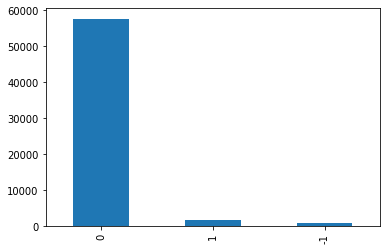

In [44]:
df['class'].value_counts().plot(kind = 'bar')
plt.show()